<a href="https://colab.research.google.com/github/SreejaSRM/positive-negative-neutral-news-/blob/main/twitter_sentimental_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this is sentimental analysis which fetches data fro twitter


In [ ]:
#importing libraries  here 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the keys files
from google.colab import files
uploaded=files.upload()

Saving Login1.csv to Login1.csv


In [ ]:
#get the data
log = pd.read_csv('Login1.csv')

# API id's from tiwtter

In [ ]:
#getting the twitter API ids
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]



In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the acess token and acess token secret 
authenticate.set_access_token(accessToken, accessTokenSecret)

#creating the API object while passing in the auth information 
api = tweepy.API(authenticate, wait_on_rate_limit = True)
 

In [ ]:
#Extracting 100 tweets from the twitter users
posts = api.user_timeline(screen_name = "TIME",count=100,lang="en",tweet_mode="extended")

#print last 5 twets from the hash
print("show the 5 recent tweets: \n")

i=1
for tweet in posts[0:5]:
  print(str(i) +')'+ tweet.full_text + '\n')
  i = i+1



show the 5 recent tweets: 

1)FDA extends Pfizer-BioNTech COVID-19 vaccine refrigeration storage time to 30 days https://t.co/DK4A3QLQWV

2)The best podcasts of 2021 so far https://t.co/kvJkwjbC20

3)Fadi Abu Shammala: I've tried to keep my kids safe through 3 bombardments of Gaza. It's never been like this before https://t.co/v4jepJmJQr

4)Ford's new electric F-150 Lightning is more than it seems
https://t.co/LktYeN2ewX

5).@Planet_deb: Indian needs all the help it can get to fight COVID-19, but who does humanitarian aid really serve?
https://t.co/Hc92O3xuPh



# storing data from twitter in dataframes

In [ ]:
# creting dataframe and storing in to it

df = pd.DataFrame( [tweet.full_text for tweet in posts],columns=['Tweets'])



In [ ]:
#showing the first 5 rows of data
df.head(5)
#df.size




,Tweets
0,FDA extends Pfizer-BioNTech COVID-19 vaccine r...
1,The best podcasts of 2021 so far https://t.co/...
2,Fadi Abu Shammala: I've tried to keep my kids ...
3,Ford's new electric F-150 Lightning is more th...
4,.@Planet_deb: Indian needs all the help it can...


# cleaning data 

In [ ]:
import pandas as pd
import string 

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import tokenize



In [ ]:
import nltk 
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

177

In [ ]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [ ]:
def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text

In [ ]:
!pip install contractions

     |████████████████████████████████| 286kB 2.8MB/s 
     |████████████████████████████████| 327kB 16.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85390 sha256=a18a8c3edede391f43f878d73ffd5094e730cb4b80e335b985dbef98b91ede3b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
import contractions
def con(text):
  expand = contractions.fix(text)
  return expand

In [ ]:
import re
def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]' 
  text = re.sub(pattern,'',text)
  return text

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [ ]:
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip()for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

In [ ]:
df.Tweets = df.Tweets.apply(lambda x:x.lower())

In [ ]:
df.Tweets = df.Tweets.apply(html_tag)

In [ ]:
df.Tweets = df.Tweets.apply(con)

In [ ]:
df.Tweets= df.Tweets.apply(remove_sp)

In [ ]:
df.Tweets = df.Tweets.apply(remove_stopwords)

In [ ]:
df.head()

,Tweets
0,fda extends pfizerbiontech covid19 vaccine ref...
1,best podcasts 2021 far httpstcokvjkwjbc20
2,fadi abu shammala I tried keep kids safe 3 bom...
3,fords new electric f150 lightning seems httpst...
4,planetdeb indian needs help get fight covid19 ...


# polarity and subjectivity

In [ ]:
#create a function to get the subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creating a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity  

#create two new column
df['subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,subjectivity,Polarity
0,fda extends pfizerbiontech covid19 vaccine ref...,0.000000,0.000000
1,best podcasts 2021 far httpstcokvjkwjbc20,0.650000,0.550000
2,fadi abu shammala I tried keep kids safe 3 bom...,0.500000,0.500000
3,fords new electric f150 lightning seems httpst...,0.454545,0.136364
4,planetdeb indian needs help get fight covid19 ...,0.200000,0.200000
...,...,...,...
95,cdc clearly jumped gun new guidance leave vuln...,0.409470,-0.065909
96,conflict gaza strip could lead new covid19 sur...,0.454545,0.136364
97,2020 election breakthrough moment young voters...,0.400000,0.100000
98,ayelet gundargoshen israel bleeding within res...,0.687500,0.156250


WORLD CLOUD 

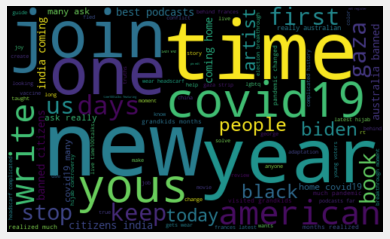

In [ ]:
allwords = ' '.join ([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500,height = 300 , random_state = 21 ,max_font_size = 119).generate(allwords)
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

# dataframe with pos,neg and neu

In [ ]:
#crete a function to compute negative , neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return "Positive"

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,subjectivity,Polarity,Analysis
0,fda extends pfizerbiontech covid19 vaccine ref...,0.000000,0.000000,Neutral
1,best podcasts 2021 far httpstcokvjkwjbc20,0.650000,0.550000,Positive
2,fadi abu shammala I tried keep kids safe 3 bom...,0.500000,0.500000,Positive
3,fords new electric f150 lightning seems httpst...,0.454545,0.136364,Positive
4,planetdeb indian needs help get fight covid19 ...,0.200000,0.200000,Positive
...,...,...,...,...
95,cdc clearly jumped gun new guidance leave vuln...,0.409470,-0.065909,Negative
96,conflict gaza strip could lead new covid19 sur...,0.454545,0.136364,Positive
97,2020 election breakthrough moment young voters...,0.400000,0.100000,Positive
98,ayelet gundargoshen israel bleeding within res...,0.687500,0.156250,Positive


# Positive Tweets

In [ ]:
 #printing all positive tweets
 j=1
 sortdf = df.sort_values(by = ['Polarity'])
 for i in range(0,sortdf.shape[0]):
   if(sortdf['Analysis'][i] == 'Positive'):
     print(str(j) +')' +sortdf['Tweets'][i])
     print()
     j=j+1

1)best podcasts 2021 far httpstcokvjkwjbc20

2)fadi abu shammala I tried keep kids safe 3 bombardments gaza never like httpstcov4jepjmjqr

3)fords new electric f150 lightning seems httpstcolktyen2ewx

4)planetdeb indian needs help get fight covid19 humanitarian aid really serve httpstcohc92o3xuph

5)review hbo maxs hilarious showbiz comedy hacks star vehicle jean smart deserves httpstcovw5zdt4gdu

6)three new books find drama scandals controversies publishing world httpstcozglde3ukgi

7)applications open times best inventions 2021 make list enter httpstcoslurhdfdll httpstcoq6tp05jttl

8)comedian patti harrison first leading rolebut not looking stop goofing around httpstco9oaeu9gftp

9)make meaningful connections age zoom according jonlevytlb author invited httpstcoqovajoxa1x

10)2020 election breakthrough moment young voters httpstcoknrmi1iruj

11)communities color found strength joy comfort year like no time highlights five served vital support systems pandemic httpstcoz9nhefaxvc http

# Negative Tweets

In [ ]:
#printing all negative tweets
j=1
sortdf = df.sort_values(by = ['Polarity'],ascending='False')
for i in range(0,sortdf.shape[0]):
  if(sortdf['Analysis'][i] == 'Negative'):
     print(str(j) +')' +sortdf['Tweets'][i])
     print()
     j=j+1

1)pandemic cut aviations emissions half 2020 industry solve longterm carbon problem httpstco1vyapqhdpt

2)new crowdsourcing app hopes serve green book lgbtq people color httpstco8ldsaz3bsr

3)terrible year women economy places working toward feminist recovery covid19 httpstcogrxtmf2wwl

4)reynosa tijuana shelter capacity worn thin yous continues expel migrants httpstcoqkqj8b5uqo

5)ice end use georgia detention facility center hysterectomy allegations httpstcoihbvvbpp5u

6)gets wear headscarf complicated history behind frances latest hijab controversy httpstcoigqmnlwdof

7)sebastianjunger father fled fascism spainand taught lies destroy democracy httpstco1meffdenwn

8)people expected police behavior change george floyds murder numbers tell different story httpstcorspf9zrp8x

9)gaza strip 25 miles long became center decades conflict httpstcolbsgkzohrl

10)could things gone wrong company founded two stanford students said wanted make cigarettes obsolete httpstcovhaxpz05y0

11)anticipated

In [ ]:
 #printing all nuetral tweets
 j=1
 sortdf = df.sort_values(by = ['Polarity'])
 for i in range(0,sortdf.shape[0]):
   if(sortdf['Analysis'][i] == 'Neutral'):
     print(str(j) +')' +sortdf['Tweets'][i])
     print()
     j=j+1

1)fda extends pfizerbiontech covid19 vaccine refrigeration storage time 30 days httpstcodk4a3qlqwv

2)china cracking untouchable tech titans httpstcomebmirhlvt

3)informed united subscribe time httpstco5e5hoajoeh httpstcoyb68iu9woa

4)susannaschrobs depression pandemic let us use lessons covid19 find treatments httpstcot6xry6cf9a

5)anthony fauci 100 days biden administration finally getting job httpstco65xciif7mn

6)know woman window movie adaptation hits netflix httpstcovl1nsq6bft

7)china cracking untouchable tech titans httpstcojudivfmzyi

8)animated guide years massive brood x cicada emergence httpstcohq95umzzjg

9)fda extends pfizerbiontech covid19 vaccine refrigeration storage time 30 days httpstcowquursxmkr

10)know summit joe biden moon jaein httpstcohxcnmn1lul

11)colsonwhitehead margaretatwood discuss underground railroad handmaids tale challenges adaptation httpstcoyrxqcj8kzd

12)china says provide covid19 vaccines almost 40 african states httpstcon4cexfktbu

13)israel unle

# scatterd graph between polarity and subjectivity

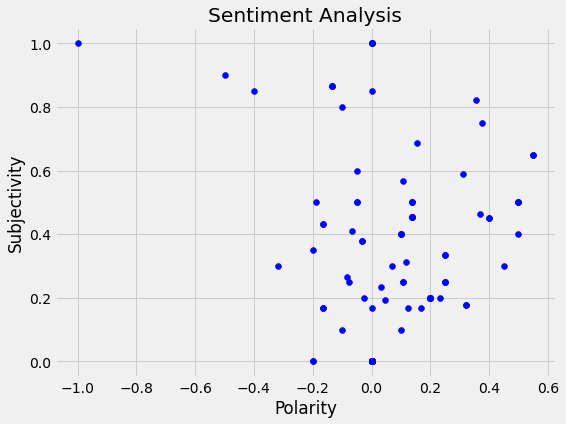

In [ ]:
#plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['subjectivity'][i],color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [ ]:
#getting the percentage of positive twwets

postweets = df[df.Analysis == 'Positive']
postweets = postweets['Tweets']

round( (postweets.shape[0]/df.shape[0])*100 ,1)


49.0

In [ ]:
#negative tweets percetage 

negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['Tweets']

round( (negtweets.shape[0]/df.shape[0])*100 ,1)


26.0

In [ ]:
#neutral  tweets percetage 

newtweets = df[df.Analysis == 'Neutral']
newtweets = newtweets['Tweets']

round( (newtweets.shape[0]/df.shape[0])*100 ,1)

25.0

# Bar graph

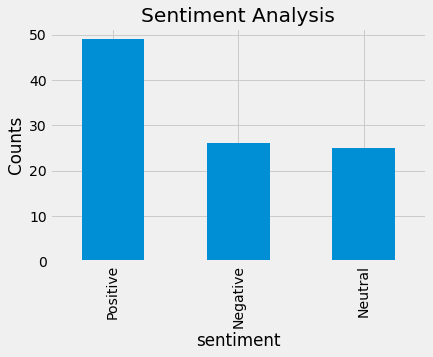

In [ ]:
#showing the value counts

df['Analysis'].value_counts()

#plot
plt.title('Sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

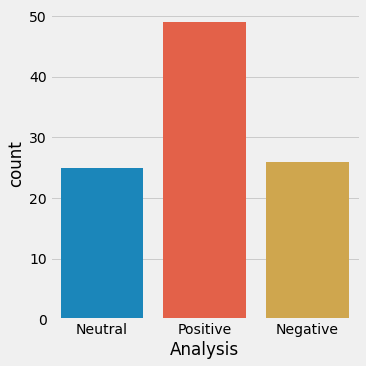

In [ ]:
sns.catplot(x ='Analysis',data=df,kind ='count')

In [ ]:
categories = df['Analysis'].values #converting to arrays
np.unique(categories,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object), array([26, 25, 49]))

In [ ]:
categories = df['Analysis'].values #converting to arrays
unique,count_s=np.unique(categories,return_counts=True)
print(f'Negative:{count_s[0]}')
print(f'Neutral:{count_s[1]}')
print(f'Positive:{count_s[2]}')

Negative:26
Neutral:25
Positive:49


<BarContainer object of 3 artists>

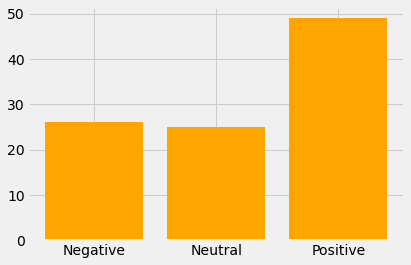

In [ ]:
lable = ['Negative','Neutral','Positive']
#plt.bar(unique,lable)
plt.bar(lable,count_s,color='orange')

# Corralation 

In [ ]:
news_numeric = df.select_dtypes(include = ['float64','int64'])
news_numeric.head()

,subjectivity,Polarity
0,0.000000,0.000000
1,0.650000,0.550000
2,0.500000,0.500000
3,0.454545,0.136364
4,0.200000,0.200000


In [ ]:
news_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subjectivity  100 non-null    float64
 1   Polarity      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
cor = news_numeric.corr()
cor

,subjectivity,Polarity
subjectivity,1.00000,-0.07219
Polarity,-0.07219,1.00000


# accuracy and confusion matrix

In [ ]:
df.head()

,Tweets,subjectivity,Polarity,Analysis
0,fda extends pfizerbiontech covid19 vaccine ref...,0.000000,0.000000,Neutral
1,best podcasts 2021 far httpstcokvjkwjbc20,0.650000,0.550000,Positive
2,fadi abu shammala I tried keep kids safe 3 bom...,0.500000,0.500000,Positive
3,fords new electric f150 lightning seems httpst...,0.454545,0.136364,Positive
4,planetdeb indian needs help get fight covid19 ...,0.200000,0.200000,Positive


In [ ]:
df1 = df.drop(['subjectivity','Polarity'],axis =1)

In [ ]:
df1

,Tweets,Analysis
0,fda extends pfizerbiontech covid19 vaccine ref...,Neutral
1,best podcasts 2021 far httpstcokvjkwjbc20,Positive
2,fadi abu shammala I tried keep kids safe 3 bom...,Positive
3,fords new electric f150 lightning seems httpst...,Positive
4,planetdeb indian needs help get fight covid19 ...,Positive
...,...,...
95,cdc clearly jumped gun new guidance leave vuln...,Negative
96,conflict gaza strip could lead new covid19 sur...,Positive
97,2020 election breakthrough moment young voters...,Positive
98,ayelet gundargoshen israel bleeding within res...,Positive


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.0MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()

In [ ]:
df1['compound'] = df1['Tweets'].apply(lambda x: vs.polarity_scores(x)['compound'])

In [ ]:
df1.head()

,Tweets,Analysis,compound
0,fda extends pfizerbiontech covid19 vaccine ref...,Neutral,0.1280
1,best podcasts 2021 far httpstcokvjkwjbc20,Positive,0.6369
2,fadi abu shammala I tried keep kids safe 3 bom...,Positive,0.1999
3,fords new electric f150 lightning seems httpst...,Positive,0.0000
4,planetdeb indian needs help get fight covid19 ...,Positive,0.0258


In [ ]:
df1.Tweets[3]

'fords new electric f150 lightning seems httpstcolktyen2ewx'

In [ ]:

df1[df1['compound'] == 0 ]

,Tweets,Analysis,compound
3,fords new electric f150 lightning seems httpst...,Positive,0.0
5,china cracking untouchable tech titans httpstc...,Neutral,0.0
15,2020 election breakthrough moment young voters...,Positive,0.0
22,visited grandkids 16 months realized much pand...,Positive,0.0
23,anthony fauci 100 days biden administration fi...,Neutral,0.0
25,gets wear headscarf complicated history behind...,Negative,0.0
26,know woman window movie adaptation hits netfli...,Neutral,0.0
27,china cracking untouchable tech titans httpstc...,Neutral,0.0
29,animated guide years massive brood x cicada em...,Neutral,0.0
39,know summit joe biden moon jaein httpstcohxcnm...,Neutral,0.0


In [ ]:
df1['pred'] = df1['compound'].apply(lambda x : 'pos' if x>0  else ('neu' if x==0 else 'neg'))
df1.head(5)

,Tweets,Analysis,compound,pred
0,fda extends pfizerbiontech covid19 vaccine ref...,Neutral,0.1280,pos
1,best podcasts 2021 far httpstcokvjkwjbc20,Positive,0.6369,pos
2,fadi abu shammala I tried keep kids safe 3 bom...,Positive,0.1999,pos
3,fords new electric f150 lightning seems httpst...,Positive,0.0000,neu
4,planetdeb indian needs help get fight covid19 ...,Positive,0.0258,pos


In [ ]:
x = df1.iloc[:,0].values
y = df1.iloc[:,1].values

# Spliting the data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(75,)
(25,)


In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object), array([18, 21, 36]))

In [ ]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object), array([ 8,  4, 13]))

# SVM Algorithm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vect',TfidfVectorizer()),
                   ('model',SVC())])

In [ ]:
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', de

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.72

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 3,  0,  0],
       [ 0,  2,  0],
       [ 5,  2, 13]])

In [ ]:
ynew = model.predict(['good people and good world'])
ynew

array(['Positive'], dtype=object)

# Decission tree Algorithm

In [ ]:
df1.head()

,Tweets,Analysis,compound,pred
0,fda extends pfizerbiontech covid19 vaccine ref...,Neutral,0.1280,pos
1,best podcasts 2021 far httpstcokvjkwjbc20,Positive,0.6369,pos
2,fadi abu shammala I tried keep kids safe 3 bom...,Positive,0.1999,pos
3,fords new electric f150 lightning seems httpst...,Positive,0.0000,neu
4,planetdeb indian needs help get fight covid19 ...,Positive,0.0258,pos


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
model1= Pipeline([('vect',TfidfVectorizer()),
                   ('model', DecisionTreeClassifier())])

In [ ]:
model1.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
             

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.6

In [ ]:
confusion_matrix(y_pred,y_test)

array([[3, 0, 0],
       [0, 3, 4],
       [5, 1, 9]])

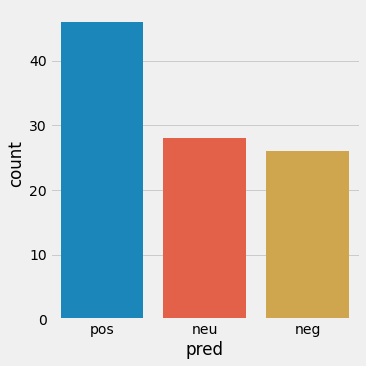

In [ ]:
sns.catplot(x ='pred',data=df1,kind ='count')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

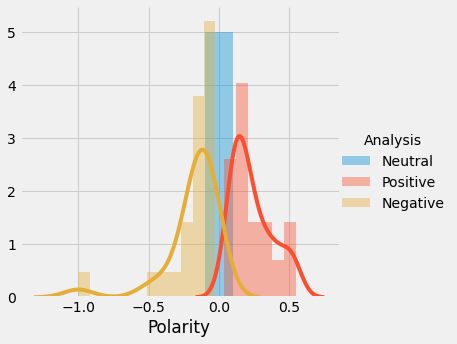

In [ ]:
sns.FacetGrid(df,hue='Analysis',size=5).map(sns.distplot,'Polarity').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipp

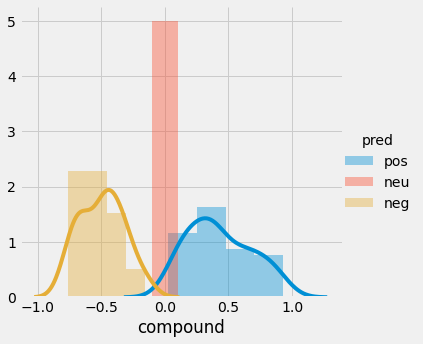

In [ ]:
sns.FacetGrid(df1,hue='pred',size=5).map(sns.distplot,'compound').add_legend()